In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
train_df = pd.read_csv('./Train.csv')
train_df['Team1_win']=np.where(train_df.Team1==train_df.MatchWinner, 1, 0)
train_df['Team2_win']=np.where(train_df.Team2==train_df.MatchWinner, 1, 0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team1          2508 non-null   int64 
 1   Team2          2508 non-null   int64 
 2   Stadium        2508 non-null   int64 
 3   HostCountry    2508 non-null   int64 
 4   Team1_Venue    2508 non-null   object
 5   Team2_Venue    2508 non-null   object
 6   Team1_Innings  2508 non-null   object
 7   Team2_Innings  2508 non-null   object
 8   MonthOfMatch   2508 non-null   object
 9   MatchWinner    2508 non-null   int64 
 10  Team1_win      2508 non-null   int64 
 11  Team2_win      2508 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 235.2+ KB


In [111]:
train_df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,Team1_win,Team2_win
0,5,4,37,4,Home,Away,Second,First,Dec,4,0,1
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1,1,0
2,9,15,47,9,Home,Away,First,Second,Feb,9,1,0
3,7,2,102,6,Home,Away,First,Second,Aug,2,0,1
4,6,8,46,5,Home,Away,First,Second,Aug,6,1,0


In [112]:
# train_df[((train_df.Team1==5) & (train_df.Team2==4)) | ((train_df.Team1==4) & (train_df.Team2==5))]

In [113]:
team1_wins = train_df.groupby(['Team1']).agg({'Team1_win':['sum','count']}).reset_index()
team1_wins.columns = ['Team','wins','matches']
team2_wins = train_df.groupby(['Team2']).agg({'Team2_win':['sum','count']}).reset_index()
team2_wins.columns = ['Team','wins','matches']
team_winrate = team1_wins.merge(team2_wins, on = ['Team'])
team_winrate['wins'] = team_winrate['wins_x'] + team_winrate['wins_y']
team_winrate['matches'] = team_winrate['matches_x'] + team_winrate['matches_y']
team_winrate['win_rate'] = team_winrate['wins']/team_winrate['matches']
team_winrate = team_winrate[['Team','wins','matches','win_rate']]
team_winrate

,Team,wins,matches,win_rate
0,0,27,56,0.482143
1,1,379,590,0.642373
2,2,70,225,0.311111
3,3,8,49,0.163265
4,4,237,452,0.524336
5,5,318,602,0.528239
6,6,33,76,0.434211
7,7,24,98,0.244898
8,8,15,45,0.333333
9,9,223,476,0.468487


In [114]:
train_df[['Team1','Team2','Team1_win']]

,Team1,Team2,Team1_win
0,5,4,0
1,1,14,1
2,9,15,1
3,7,2,0
4,6,8,1
...,...,...,...
2503,5,15,1
2504,1,14,1
2505,14,5,1
2506,15,14,0


In [115]:
win_impact = train_df[['Team1','Team2','Team1_win']].merge(team_winrate, left_on=['Team1'], right_on=['Team'])
win_impact = win_impact.merge(team_winrate, left_on=['Team2'], right_on=['Team'])
win_impact['win_rate_diff'] = win_impact['win_rate_x'] - win_impact['win_rate_y']
win_impact['match_diff'] = win_impact['matches_x'] - win_impact['matches_y']
assert win_impact.shape[0] == train_df.shape[0]
win_impact.tail()

,Team1,Team2,Team1_win,Team_x,wins_x,matches_x,win_rate_x,Team_y,wins_y,matches_y,win_rate_y,win_rate_diff,match_diff
2503,11,0,0,11,18,52,0.346154,0,27,56,0.482143,-0.135989,-4
2504,11,0,1,11,18,52,0.346154,0,27,56,0.482143,-0.135989,-4
2505,8,0,0,8,15,45,0.333333,0,27,56,0.482143,-0.148810,-11
2506,8,0,0,8,15,45,0.333333,0,27,56,0.482143,-0.148810,-11
2507,8,0,0,8,15,45,0.333333,0,27,56,0.482143,-0.148810,-11


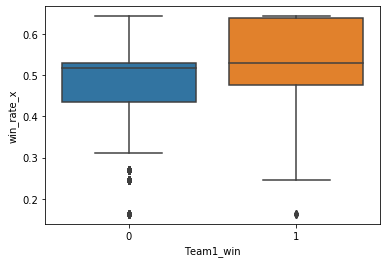

In [116]:
sns.boxplot(data = win_impact, x = 'Team1_win', y = 'win_rate_x')

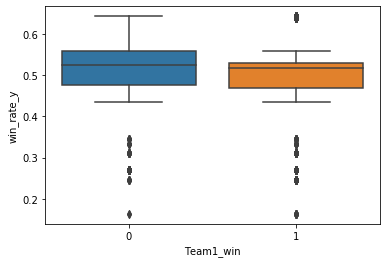

In [117]:
sns.boxplot(data = win_impact, x = 'Team1_win', y = 'win_rate_y')

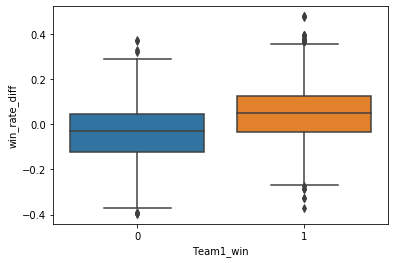

In [118]:
sns.boxplot(data = win_impact, x = 'Team1_win', y = 'win_rate_diff')

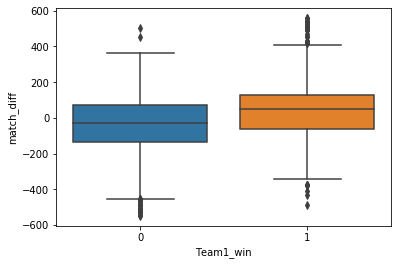

In [119]:
sns.boxplot(data = win_impact, x = 'Team1_win', y = 'match_diff')

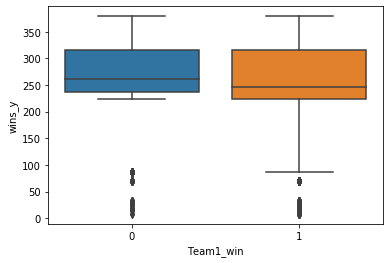

In [120]:
sns.boxplot(data = win_impact, x = 'Team1_win', y = 'wins_y')

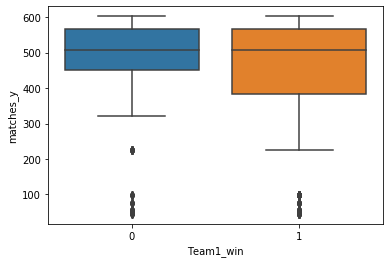

In [121]:
sns.boxplot(data = win_impact, x = 'Team1_win', y = 'matches_y')

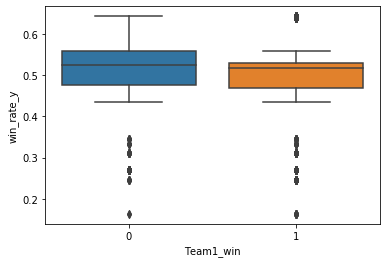

In [122]:
sns.boxplot(data = win_impact, x = 'Team1_win', y = 'win_rate_y')

In [123]:
train_df['Team1_Venue'] = train_df['Team1_Innings']
train_df['Team2_Venue'] = train_df['Team2_Innings']
team1_venue_wins = train_df.groupby(['Team1','Team1_Venue']).agg({'Team1_win':['sum','count']}).reset_index()
team1_venue_wins.columns = ['Team','Venue','wins','matches']
team2_venue_wins = train_df.groupby(['Team2','Team2_Venue']).agg({'Team2_win':['sum','count']}).reset_index()
team2_venue_wins.columns = ['Team','Venue','wins','matches']
team_venue_wins = pd.concat([team1_venue_wins, team2_venue_wins], axis=0)
team_venue_wins = team_venue_wins.groupby(['Team','Venue']).agg({'wins':['sum'], 'matches':['sum']}).reset_index()
team_venue_wins.columns = ['Team','Venue','wins','matches']
team_venue_wins['venue_win_rate'] = team_venue_wins['wins']/team_venue_wins['matches']
team_venue_wins

,Team,Venue,wins,matches,venue_win_rate
0,0,First,10,26,0.384615
1,0,Second,17,30,0.566667
2,1,First,207,322,0.642857
3,1,Second,172,268,0.641791
4,2,First,33,114,0.289474
5,2,Second,37,111,0.333333
6,3,First,2,24,0.083333
7,3,Second,6,25,0.240000
8,4,First,97,206,0.470874
9,4,Second,140,246,0.569106


In [124]:
venue_impact = train_df[['Team1','Team2', 'Team1_Venue', 'Team2_Venue','Team1_win']]\
.merge(team_venue_wins, left_on=['Team1','Team1_Venue'], right_on=['Team','Venue'])
venue_impact = venue_impact.merge(team_venue_wins, left_on=['Team2','Team2_Venue'], right_on=['Team','Venue'])
venue_impact['venue_win_rate_diff'] = venue_impact['venue_win_rate_x'] - venue_impact['venue_win_rate_y']
venue_impact['venue_match_diff'] = venue_impact['matches_x'] - venue_impact['matches_y']
assert venue_impact.shape[0] == train_df.shape[0]
venue_impact.tail()

,Team1,Team2,Team1_Venue,Team2_Venue,Team1_win,Team_x,Venue_x,wins_x,matches_x,venue_win_rate_x,Team_y,Venue_y,wins_y,matches_y,venue_win_rate_y,venue_win_rate_diff,venue_match_diff
2503,7,3,Second,First,1,7,Second,13,42,0.309524,3,First,2,24,0.083333,0.226190,18
2504,11,3,Second,First,1,11,Second,10,24,0.416667,3,First,2,24,0.083333,0.333333,0
2505,11,3,Second,First,1,11,Second,10,24,0.416667,3,First,2,24,0.083333,0.333333,0
2506,8,3,Second,First,1,8,Second,11,26,0.423077,3,First,2,24,0.083333,0.339744,2
2507,0,3,Second,First,1,0,Second,17,30,0.566667,3,First,2,24,0.083333,0.483333,6


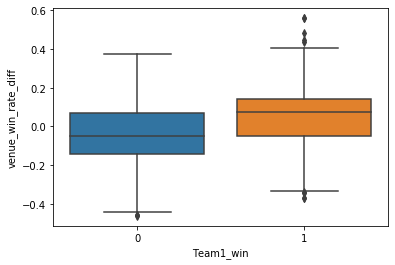

In [125]:
sns.boxplot(data = venue_impact, x = 'Team1_win', y = 'venue_win_rate_diff')

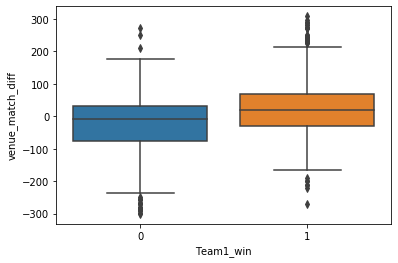

In [126]:
sns.boxplot(data = venue_impact, x = 'Team1_win', y = 'venue_match_diff')

In [76]:
stadiums = train_df[['Stadium', 'HostCountry']].drop_duplicates()
stadium_dist = stadiums.groupby(['Stadium'])['HostCountry'].nunique()
stadium_dist.min(), stadium_dist.max()

(1, 1)

In [80]:
stadiums.sort_values(['Stadium'])['Stadium'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 127, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147,
       148, 149, 150, 151])

In [87]:
team1_stadium_wins = train_df.groupby(['Team1','Stadium']).agg({'Team1_win':['sum','count']}).reset_index()
team1_stadium_wins.columns = ['Team','Stadium','stadium_wins','stadium_matches']
team2_stadium_wins = train_df.groupby(['Team2','Stadium']).agg({'Team2_win':['sum','count']}).reset_index()
team2_stadium_wins.columns = ['Team','Stadium','stadium_wins','stadium_matches']
team_stadium_wins = pd.concat([team1_stadium_wins, team2_stadium_wins], axis=0)
team_stadium_wins = team_stadium_wins.groupby(['Team','Stadium']).agg({'stadium_wins':['sum'], 
                                                                       'stadium_matches':['sum']}).reset_index()
team_stadium_wins.columns = ['Team','Stadium','stadium_wins','stadium_matches']
team_stadium_wins['stadium_win_rate'] = team_stadium_wins['stadium_wins']/team_stadium_wins['stadium_matches']
team_stadium_wins.head()

,Team,Stadium,stadium_wins,stadium_matches,stadium_win_rate
0,0,7,2,2,1.000000
1,0,9,1,2,0.500000
2,0,12,1,3,0.333333
3,0,22,3,7,0.428571
4,0,24,0,1,0.000000


In [91]:
stadium_impact = train_df[['Team1','Team2', 'Stadium', 'Team1_win']]\
.merge(team_stadium_wins, left_on=['Team1','Stadium'], right_on=['Team','Stadium'])
stadium_impact = stadium_impact.merge(team_stadium_wins, left_on=['Team2','Stadium'], right_on=['Team','Stadium'])
stadium_impact['stadium_win_rate_diff'] = stadium_impact['stadium_win_rate_x'] - stadium_impact['stadium_win_rate_y']
stadium_impact['stadium_match_diff'] = stadium_impact['stadium_matches_x'] - stadium_impact['stadium_matches_y']
assert stadium_impact.shape[0] == train_df.shape[0]
stadium_impact.tail()

,Team1,Team2,Stadium,Team1_win,Team_x,stadium_wins_x,stadium_matches_x,stadium_win_rate_x,Team_y,stadium_wins_y,stadium_matches_y,stadium_win_rate_y,stadium_win_rate_diff,stadium_match_diff
2503,4,13,10,1,4,1,1,1.0,13,0,1,0.0,1.0,0
2504,1,5,31,0,1,0,1,0.0,5,1,1,1.0,-1.0,0
2505,10,13,92,1,10,1,1,1.0,13,0,1,0.0,1.0,0
2506,6,11,45,1,6,1,2,0.5,11,0,1,0.0,0.5,1
2507,4,7,58,1,4,2,4,0.5,7,0,2,0.0,0.5,2


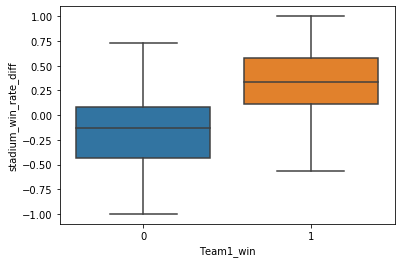

In [92]:
sns.boxplot(data = stadium_impact, x = 'Team1_win', y = 'stadium_win_rate_diff')

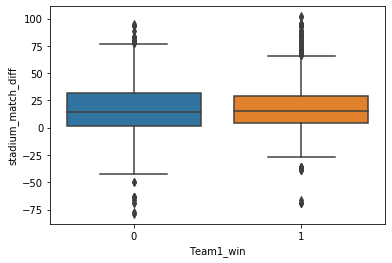

In [93]:
sns.boxplot(data = stadium_impact, x = 'Team1_win', y = 'stadium_match_diff')

In [95]:
team_stadium_wins.groupby(['Team'])['Stadium'].count()

Team
0      20
1      86
2      62
3      28
4      83
5     100
6      26
7      44
8      26
9      98
10     91
11     21
12     75
13     96
14     93
15     79
Name: Stadium, dtype: int64

In [96]:
test_df = pd.read_csv('./Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team1          1075 non-null   int64 
 1   Team2          1075 non-null   int64 
 2   Stadium        1075 non-null   int64 
 3   HostCountry    1075 non-null   int64 
 4   Team1_Venue    1075 non-null   object
 5   Team2_Venue    1075 non-null   object
 6   Team1_Innings  1075 non-null   object
 7   Team2_Innings  1075 non-null   object
 8   MonthOfMatch   1075 non-null   object
dtypes: int64(4), object(5)
memory usage: 75.7+ KB


In [105]:
test_df['Stadium'] = test_df['HostCountry']
test_stadiums = test_df[['Team1','Stadium']].drop_duplicates()
test_stadiums.columns = ['Team2','Stadium']
test_stadiums = pd.concat([test_stadiums, test_df[['Team2','Stadium']].drop_duplicates()], axis = 0)
test_stadiums = test_stadiums.drop_duplicates()
test_stadiums.columns = ['Team','Stadium']
test_stadiums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 1061
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Team     193 non-null    int64
 1   Stadium  193 non-null    int64
dtypes: int64(2)
memory usage: 4.5 KB


In [106]:
test_stadiums.groupby('Team')['Stadium'].count()

Team
0      9
1     15
2     13
3      8
4     14
5     15
6     11
7     11
8      9
9     12
10    15
11    10
12    13
13    13
14    13
15    12
Name: Stadium, dtype: int64

In [107]:
missing_stadiums = test_stadiums.merge(team_stadium_wins, how='left', on=['Team','Stadium'])
missing_stadiums['missing'] = np.where(missing_stadiums['stadium_win_rate'].isna(),1,0)
missing_stadiums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team              193 non-null    int64  
 1   Stadium           193 non-null    int64  
 2   stadium_wins      80 non-null     float64
 3   stadium_matches   80 non-null     float64
 4   stadium_win_rate  80 non-null     float64
 5   missing           193 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 10.6 KB


In [108]:
missing_stadiums.groupby(['Team']).agg({'missing':['sum','count']})

missing      
         sum count
Team              
0          8     9
1          8    15
2          9    13
3          6     8
4          5    14
5          5    15
6          8    11
7          8    11
8          6     9
9          5    12
10         9    15
11         5    10
12         9    13
13         5    13
14         8    13
15         9    12